In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
%run ./analysis_utils/lang_comparer.py
%run ./analysis_utils/chunk_comparer.py

#### Utils

In [3]:
def merge_results(results, merge_on="chunk_bucket"):
    model_names = list(results.keys())
    model_dfs = list(results.values())
    merged = model_dfs[0]
    for i, (model_name, model_df) in enumerate(zip(model_names[1:], model_dfs[1:])):
        if merge_on == "chunk_bucket":
            model_df = model_df.drop(columns=["chunk_buckets", "count"])
        else:
            model_df = model_df.drop(columns=["count"])
        merged = merged.merge(model_df, on=merge_on, suffixes=("", f"_{model_name}"))
    return merged

### Lang Comparison

In [4]:
baseline_lang_comparer = LangComparer(model="baseline", test_path="../../data/test/merged_test_data.csv")
baseline_df = baseline_lang_comparer.run()

chunk_lang_comparer = LangComparer(model="chunk_combinations", test_path="../../data/test/merged_test_data.csv")
chunk_df = chunk_lang_comparer.run()

text_sum_lang_comparer = LangComparer(model="text_summarizer", test_path="../../data/test/merged_test_data.csv")
text_sum_df = text_sum_lang_comparer.run()

results = {
    "baseline": baseline_df,
    "chunk_combinations": chunk_df,
    "text_summarizer": text_sum_df
}

merged_df = merge_results(results, merge_on="lang_pair")

In [5]:
merged_df["corr_diff_1_4_percentage"] = round((merged_df["mean_corr_chunk_combinations"] - merged_df["mean_corr"]) / merged_df["mean_corr"] * 100, 2)
merged_df["corr_diff_1_2_percentage"] = round((merged_df["mean_corr_text_summarizer"] - merged_df["mean_corr"]) / merged_df["mean_corr"] * 100, 2)

In [6]:
merged_df.head()

,count,mean_corr,mean_corr_chunk_combinations,mean_corr_text_summarizer,corr_diff_1_4_percentage,corr_diff_1_2_percentage
lang_pair,,,,,,
de_de,498,0.6825,0.666667,0.674,-2.32,-1.25
es_en,381,0.7025,0.666667,0.650,-5.10,-7.47
it_it,351,0.7250,0.693333,0.636,-4.37,-12.28
en_en,264,0.7125,0.663333,0.674,-6.90,-5.40
es_it,251,0.6500,0.483333,0.548,-25.64,-15.69


### Chunk Comparison

In [7]:
baseline_chunk_comparer = ChunkComparer(model="baseline", test_path="../../data/test/merged_test_data.csv")
baseline_chunk_df = baseline_chunk_comparer.run()

chunk_chunk_comparer = ChunkComparer(model="chunk_combinations", test_path="../../data/test/merged_test_data.csv")
chunk_chunk_df = chunk_chunk_comparer.run()

text_sum_chunk_comparer = ChunkComparer(model="text_summarizer", test_path="../../data/test/merged_test_data.csv")
text_sum_chunk_df = text_sum_chunk_comparer.run()

results = {
    "baseline": baseline_chunk_df,
    "chunk_combinations": chunk_chunk_df,
    "text_summarizer": text_sum_chunk_df
}

#### Plot Chunk Number (for 1. Baseline)

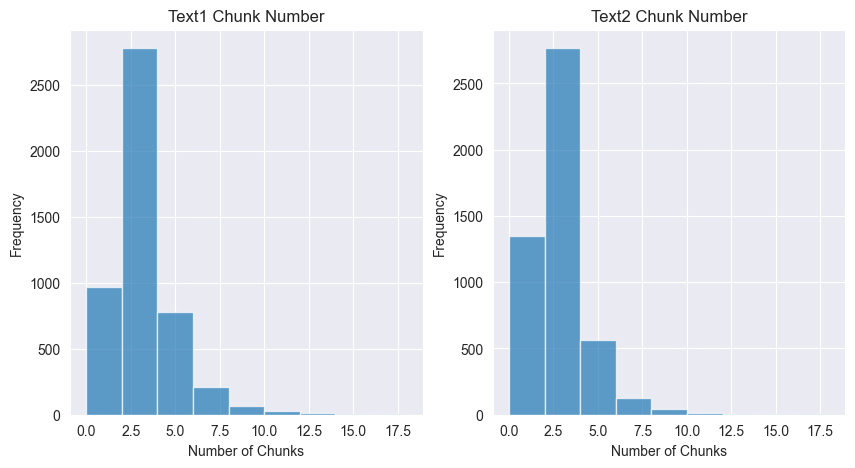

In [8]:
baseline_chunk_comparer.plot_chunk_num(baseline_chunk_comparer.test_df_with_chunk_num)

#### Plot Chunk Combination Number (for 3. Chunk Combinations)

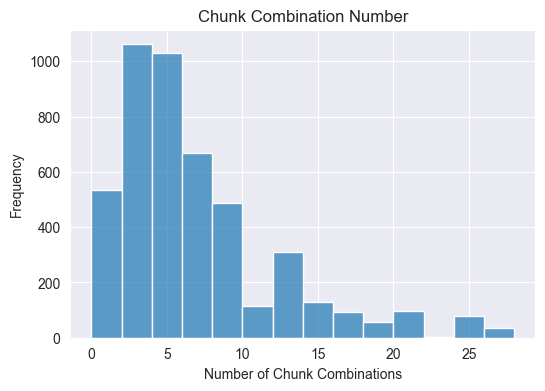

In [9]:
chunk_chunk_comparer.plot_chunk_combinations_num(chunk_chunk_comparer.test_df_with_chunk_num)

In [10]:
merged_df = merge_results(results, merge_on="chunk_bucket")
merged_df["corr_diff_1_4_percentage"] = round((merged_df["avg_corr_chunk_combinations"] - merged_df["avg_corr"]) / merged_df["avg_corr"] * 100, 2)
merged_df["corr_diff_1_2_percentage"] = round((merged_df["avg_corr_text_summarizer"] - merged_df["avg_corr"]) / merged_df["avg_corr"] * 100, 2)

merged_df = merged_df.sort_values(by="chunk_bucket")
merged_df

,count,chunk_buckets,avg_corr,avg_corr_chunk_combinations,avg_corr_text_summarizer,corr_diff_1_4_percentage,corr_diff_1_2_percentage
chunk_bucket,,,,,,,
2,1341,"(0, 2)",0.6725,0.593333,0.676,-11.77,0.52
4,1241,"(2, 4)",0.6900,0.643333,0.650,-6.76,-5.80
6,702,"(4, 6)",0.6800,0.636667,0.618,-6.37,-9.12
8,235,"(6, 8)",0.6450,0.633333,0.576,-1.81,-10.70
10,377,"(8, 10)",0.7125,0.650000,0.594,-8.77,-16.63
12,312,"(10, 12)",0.7175,0.703333,0.624,-1.97,-13.03
14,27,"(12, 14)",0.6625,0.623333,0.642,-5.91,-3.09
16,192,"(14, 16)",0.6725,0.636667,0.590,-5.33,-12.27
18,58,"(16, 18)",0.6400,0.640000,0.624,0.00,-2.50
